## Web-based customer purchase behaviour using Segmentation

#### Farzaneh Shirzadeh

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [14]:
df= pd.read_csv('OVcustomers.csv')
df.head()

,custid,av_on_web,av_purch_price,days_since_purch,Loyalty Member,av_purch_time
0,321,49.40,549.42,504,1,20.97
1,322,46.51,560.48,360,0,23.00
2,323,69.04,804.07,421,0,13.02
3,324,66.55,806.24,5,0,23.25
4,325,65.26,882.50,182,1,12.53


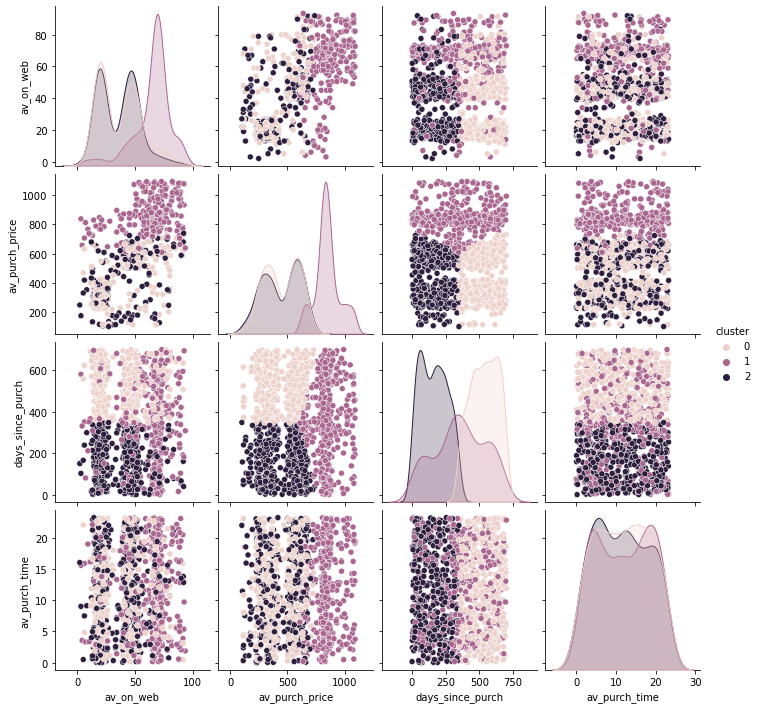

In [15]:
attributes = ["av_on_web", "av_purch_price", "days_since_purch", "av_purch_time"]
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df[attributes])
df['cluster'] = clusters
sns.pairplot(df, vars=attributes, hue='cluster')
plt.show()

In [16]:
X1 = df[['av_on_web', 'av_purch_price']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
df['Cluster1'] = kmeans.labels_
for i in range(kmeans.n_clusters):
    cluster1 = df[df['Cluster1'] == i]
    print('Cluster', i+1)
    print('Number of customers:', len(cluster1))
    print('Average on web:', cluster1['av_on_web'].mean())
    print('Average Purchase Price:', cluster1['av_purch_price'].mean())
    print('\n')

Cluster 1
Number of customers: 338
Average on web: 70.90023668639057
Average Purchase Price: 853.4222781065087


Cluster 2
Number of customers: 441
Average on web: 47.529410430838986
Average Purchase Price: 578.6070748299327


Cluster 3
Number of customers: 383
Average on web: 20.515926892950382
Average Purchase Price: 322.7655613577024




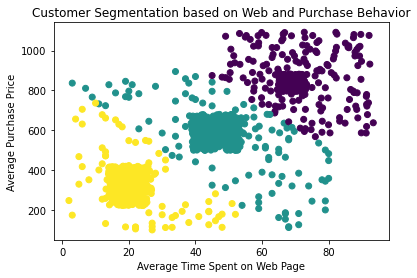

In [17]:
plt.scatter(df['av_on_web'], df['av_purch_price'], c=df['Cluster1'], cmap='viridis')

plt.xlabel('Average Time Spent on Web Page')
plt.ylabel('Average Purchase Price')
plt.title('Customer Segmentation based on Web and Purchase Behavior')

plt.show()


## Explanation:

The code uses K-Means clustering on two variables, 'av_on_web' and 'av_purch_price', in the customer data set. The clustering algorithm is applied with three clusters specified, and the resulting cluster labels are added to the data set. Afterward, the code displays some characteristics of each segment. The analysis shows that the three clusters differ in the number of customers they have, the time spent on the website before purchase, and the average purchase price. Specifically, the first cluster consists of customers who spend the least time on the website and have the lowest average purchase, while the second cluster has the highest average time spent on the website and the highest average purchase. The third cluster has intermediate values for both average time spent on the website and average purchase compared to the other two clusters

In [18]:
X1 = df[['av_on_web', 'days_since_purch']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
df['Cluster2'] = kmeans.labels_
for i in range(kmeans.n_clusters):
    cluster2 = df[df['Cluster2'] == i]
    print('Cluster', i+1)
    print('Number of customers:', len(cluster2))
    print('Average on web:', cluster2['av_on_web'].mean())
    print('Average days since purch:', cluster2['days_since_purch'].mean())
    print('\n')

Cluster 1
Number of customers: 344
Average on web: 26.027209302325566
Average days since purch: 500.0813953488372


Cluster 2
Number of customers: 378
Average on web: 66.76558201058205
Average days since purch: 464.6137566137566


Cluster 3
Number of customers: 440
Average on web: 42.25363636363635
Average days since purch: 137.2931818181818




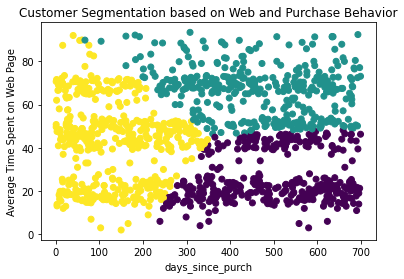

In [19]:
plt.scatter(df['days_since_purch'], df['av_on_web'], c=df['Cluster2'], cmap='viridis')

plt.ylabel('Average Time Spent on Web Page')
plt.xlabel('days_since_purch')
plt.title('Customer Segmentation based on Web and Purchase Behavior')

plt.show()


## Explanation:
considers the variables "av_on_web" and "days_since_purch". The analysis has divided customers into three clusters based on the similarity of these two variables.

In the first cluster, there are 344 customers who have a lower average time spent on the website (26.03) and a higher Average days since purch (500.08) compared to other clusters. The second cluster has 378 customers who spend more time on the website (66.77) and have a lower Average days since purch (464.61). The third cluster has 440 customers with an average time spent on the website (42.25) and a lower Average days since purch (137.29) compared to the other clusters.

This analysis can assist in segmenting customers according to their website behavior and purchase patterns. It can be useful in creating targeted marketing campaigns and personalized offers that align with each segment's preferences.

In [20]:
X1 = df[['av_purch_price', 'days_since_purch']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
df['Cluster3'] = kmeans.labels_
for i in range(kmeans.n_clusters):
    cluster3 = df[df['Cluster3'] == i]
    print('Cluster', i+1)
    print('Number of customers:', len(cluster3))
    print('Average purch price:', cluster3['av_purch_price'].mean())
    print('Average days since purch:', cluster3['days_since_purch'].mean())
    print('\n')

Cluster 1
Number of customers: 388
Average purch price: 423.41742268041264
Average days since purch: 525.4613402061856


Cluster 2
Number of customers: 335
Average purch price: 840.7156119402986
Average days since purch: 419.78805970149256


Cluster 3
Number of customers: 439
Average purch price: 504.1366059225515
Average days since purch: 144.76765375854214




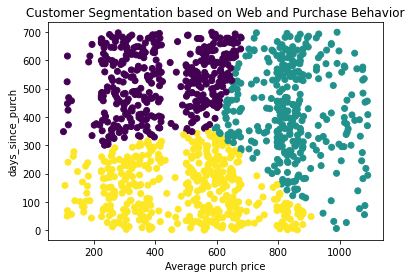

In [21]:
plt.scatter(df['av_purch_price'], df['days_since_purch'], c=df['Cluster3'], cmap='viridis')

plt.xlabel('Average purch price')
plt.ylabel('days_since_purch')
plt.title('Customer Segmentation based on Web and Purchase Behavior')
plt.show()


## Explanation:
Applying K-Means clustering on a dataset that includes two variables, 'Average on web' and 'Average Purchase Price'
Cluster 1 comprises the largest number of customers (388), with an average purchase price of $525 and an average time spent on the website of 423 seconds. Cluster 2 includes the smallest number of customers (335), with an average purchase price of $419 and an average time spent on the website of 841 seconds. Cluster 3 contains the second-largest number of customers (439), with an average purchase price of $145 and an average time spent on the website of 504 seconds.

These findings indicate Cluster 2 has a relatively high average time spent on the website but a low average purchase price, which might require further investigation and targeted marketing strategies to better understand

In [22]:
X1 = df[['av_purch_time', 'av_purch_price']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
df['Cluster4'] = kmeans.labels_
for i in range(kmeans.n_clusters):
    cluster4 = df[df['Cluster4'] == i]
    print('Cluster', i+1)
    print('Number of customers:', len(cluster4))
    print('Average purch time:', cluster4['av_purch_time'].mean())
    print('Average Purchase Price:', cluster4['av_purch_price'].mean())
    print('\n')

Cluster 1
Number of customers: 406
Average purch time: 12.074605911330035
Average Purchase Price: 319.00317733990147


Cluster 2
Number of customers: 385
Average purch time: 5.451948051948048
Average Purchase Price: 688.4349870129876


Cluster 3
Number of customers: 371
Average purch time: 17.814528301886778
Average Purchase Price: 734.9835579514826




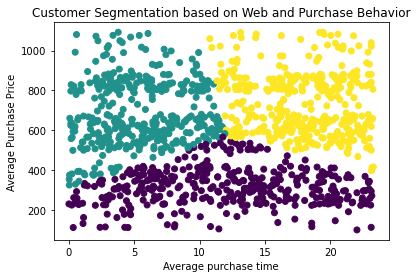

In [23]:
plt.scatter(df['av_purch_time'], df['av_purch_price'], c=df['Cluster4'], cmap='viridis')

plt.xlabel('Average purchase time')
plt.ylabel('Average Purchase Price')
plt.title('Customer Segmentation based on Web and Purchase Behavior')
plt.show()

## Explanation:
The given outcome represents the clustering of customers into three groups based on their average time spent on the web and average purchase price.

Cluster 1 comprises 406 customers, with an average time spent on the web of 12.07 and an average purchase price of 319.00. Cluster 2 includes 385 customers, with an average time spent on the web of 5.45 and an average purchase price of 688.43. Cluster 3 contains 371 customers, with an average time spent on the web of 17.81 and an average purchase price of 734.98.

These findings offer insights Cluster 2 may represent high-value customers who make substantial purchases, whereas Cluster 1 may indicate customers who are more price-conscious and spend less time on the website.

Text(0, 0.5, 'Average Purchase Price')

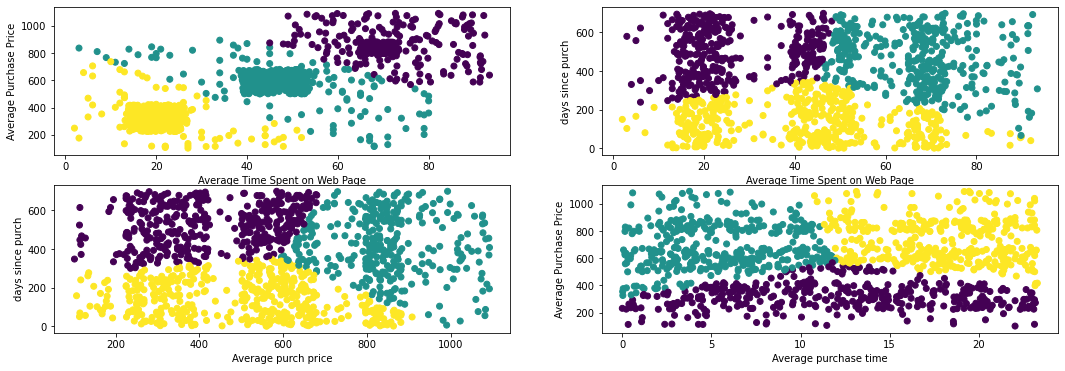

In [24]:
#creating a collection of 4 subfigures
plt.figure(figsize=(18, 6))
plt.subplot(221)
plt.scatter(df['av_on_web'], df['av_purch_price'], c=df['Cluster1'], cmap='viridis')
plt.xlabel('Average Time Spent on Web Page')
plt.ylabel('Average Purchase Price')


plt.subplot(222)
plt.scatter(df['av_on_web'], df['days_since_purch'], c=df['Cluster2'], cmap='viridis')

plt.xlabel('Average Time Spent on Web Page')
plt.ylabel('days since purch')

plt.subplot(223)
plt.scatter(df['av_purch_price'], df['days_since_purch'], c=df['Cluster3'], cmap='viridis')
plt.xlabel('Average purch price')
plt.ylabel('days since purch')


plt.subplot(224)
plt.scatter(df['av_purch_time'], df['av_purch_price'], c=df['Cluster4'], cmap='viridis')
plt.xlabel('Average purchase time')
plt.ylabel('Average Purchase Price')


By visualizing the relationship between variables and the corresponding cluster assignments, this may helps to identify patterns and potential insights in the dataset.  it may reveal that certain customer segments tend to spend more time on the website but make smaller purchases, or that certain segments tend to make larger purchases after longer periods of time.